# Kerasで訓練済みモデルを使う

（参考）
* https://keras.io/applications/
    * KerasにはImageNetの画像を利用した数種の訓練済みモデルが用意されている
* http://aidiary.hatenablog.com/entry/20170104/1483535144
    * Kerasで訓練済みVGG16を利用した画像の認識
* https://github.com/jkjung-avt/keras-cats-dogs-tutorial
    * Kaggleの学習済みモデルによる犬猫画像の認識
    * InceptionResNetV2のモデルを利用した例
    * https://jkjung-avt.github.io/keras-inceptionresnetv2/
* https://employment.en-japan.com/engineerhub/entry/2017/04/28/110000
    * Kerasによる訓練済みモデルの使用例
* https://github.com/yuyang-huang/keras-inception-resnet-v2
    * KerasによるInception-ResNet v2 モデルの別実装
* http://aidiary.hatenablog.com/entry/20161212/1481549365
    * Keras の ImageDataGeneratorを用いたデータ拡張

## 画像を入力して予測させてみる

In [8]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import sys

"""
ImageNetで学習済みのVGG16モデルを使って入力画像のクラスを予測する
"""

def test_vgg16(filename):

    # 学習済みのVGG16をロード
    # 構造とともに学習済みの重みも読み込まれる
    model = VGG16(weights='imagenet')
    # model.summary()

    # 引数で指定した画像ファイルを読み込む
    # サイズはVGG16のデフォルトである224x224にリサイズされる
    img = image.load_img(filename, target_size=(224, 224))

    # 読み込んだPIL形式の画像をarrayに変換
    x = image.img_to_array(img)

    # 3次元テンソル（rows, cols, channels) を
    # 4次元テンソル (samples, rows, cols, channels) に変換
    # 入力画像は1枚なのでsamples=1でよい
    x = np.expand_dims(x, axis=0)

    # Top-5のクラスを予測する
    # VGG16の1000クラスはdecode_predictions()で文字列に変換される
    preds = model.predict(preprocess_input(x))
    results = decode_predictions(preds, top=5)[0]
    for result in results:
        print(result)

In [11]:
# ファイルをダウンロードしておく
! wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O elephant.jpg

--2018-08-10 03:19:55--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
upload.wikimedia.org (upload.wikimedia.org) をDNSに問いあわせています... 2001:df2:e500:ed1a::2:b, 103.102.166.240
upload.wikimedia.org (upload.wikimedia.org)|2001:df2:e500:ed1a::2:b|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 168370 (164K) [image/jpeg]
`elephant.jpg' に保存中

elephant.jpg        100%[===================>] 164.42K   474KB/s 時間 0.3s       

2018-08-10 03:19:56 (474 KB/s) - `elephant.jpg' へ保存完了 [168370/168370]



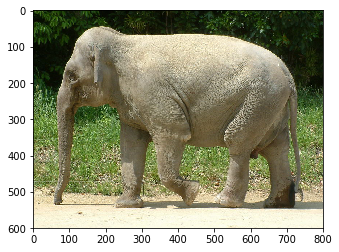

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline

#画像の読み込み
im = Image.open("./elephant.jpg")

#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

In [13]:
test_vgg16('elephant.jpg')

('n02504013', 'Indian_elephant', 0.71757305)
('n02504458', 'African_elephant', 0.24314512)
('n01871265', 'tusker', 0.036461875)
('n02437312', 'Arabian_camel', 0.0009113491)
('n01704323', 'triceratops', 0.0005137355)


## Fune Tuning
* ImageNetの1000クラス以外の物体については認識できないため，学習済みモデルを使ってそれ以外の認識に対応する

(参考) 
* https://github.com/aidiary/keras-examples/tree/master/vgg16/dogs_vs_cats
* https://elix-tech.github.io/ja/2016/06/22/transfer-learning-ja.html

### 画像の用意
(参考)　http://aidiary.hatenablog.com/entry/20170108/1483876657

* データの場所
    * https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition

* train.zip をダウンロードする（Kaggleへのユーザ登録が必要）
    * https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/train.zip
* train.zip を展開し，適当な場所（ここではカレントディレクトリ）に置く

In [22]:
! wget https://raw.githubusercontent.com/aidiary/keras-examples/master/vgg16/dogs_vs_cats/setup.py

--2018-08-10 03:48:21--  https://raw.githubusercontent.com/aidiary/keras-examples/master/vgg16/dogs_vs_cats/setup.py
raw.githubusercontent.com (raw.githubusercontent.com) をDNSに問いあわせています... 151.101.88.133
raw.githubusercontent.com (raw.githubusercontent.com)|151.101.88.133|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 1024 (1.0K) [text/plain]
`setup.py' に保存中

setup.py            100%[===================>]   1.00K  --.-KB/s 時間 0s         

2018-08-10 03:48:22 (22.2 MB/s) - `setup.py' へ保存完了 [1024/1024]



In [23]:
# setup.py を使って train ディレクトリから画像フォルダを作る
! python ./setup.py

### 出来上がったディレクトリを確認

In [24]:
! ls

VGG16(ImageNet)_Keras.ipynb setup.py
data                        train
elephant.jpg


In [25]:
! ls data

train      validation


In [26]:
! ls data/train

cats dogs


In [27]:
! ls data/train/cats data/train/dogs

data/train/cats:
cat0001.jpg cat0168.jpg cat0335.jpg cat0502.jpg cat0669.jpg cat0836.jpg
cat0002.jpg cat0169.jpg cat0336.jpg cat0503.jpg cat0670.jpg cat0837.jpg
cat0003.jpg cat0170.jpg cat0337.jpg cat0504.jpg cat0671.jpg cat0838.jpg
cat0004.jpg cat0171.jpg cat0338.jpg cat0505.jpg cat0672.jpg cat0839.jpg
cat0005.jpg cat0172.jpg cat0339.jpg cat0506.jpg cat0673.jpg cat0840.jpg
cat0006.jpg cat0173.jpg cat0340.jpg cat0507.jpg cat0674.jpg cat0841.jpg
cat0007.jpg cat0174.jpg cat0341.jpg cat0508.jpg cat0675.jpg cat0842.jpg
cat0008.jpg cat0175.jpg cat0342.jpg cat0509.jpg cat0676.jpg cat0843.jpg
cat0009.jpg cat0176.jpg cat0343.jpg cat0510.jpg cat0677.jpg cat0844.jpg
cat0010.jpg cat0177.jpg cat0344.jpg cat0511.jpg cat0678.jpg cat0845.jpg
cat0011.jpg cat0178.jpg cat0345.jpg cat0512.jpg cat0679.jpg cat0846.jpg
cat0012.jpg cat0179.jpg cat0346.jpg cat0513.jpg cat0680.jpg cat0847.jpg
cat0013.jpg cat0180.jpg cat0347.jpg cat0514.jpg cat0681.jpg cat0848.jpg
cat0014.jpg cat0181.jpg cat0348.jpg cat0515.jpg

dog0095.jpg dog0262.jpg dog0429.jpg dog0596.jpg dog0763.jpg dog0930.jpg
dog0096.jpg dog0263.jpg dog0430.jpg dog0597.jpg dog0764.jpg dog0931.jpg
dog0097.jpg dog0264.jpg dog0431.jpg dog0598.jpg dog0765.jpg dog0932.jpg
dog0098.jpg dog0265.jpg dog0432.jpg dog0599.jpg dog0766.jpg dog0933.jpg
dog0099.jpg dog0266.jpg dog0433.jpg dog0600.jpg dog0767.jpg dog0934.jpg
dog0100.jpg dog0267.jpg dog0434.jpg dog0601.jpg dog0768.jpg dog0935.jpg
dog0101.jpg dog0268.jpg dog0435.jpg dog0602.jpg dog0769.jpg dog0936.jpg
dog0102.jpg dog0269.jpg dog0436.jpg dog0603.jpg dog0770.jpg dog0937.jpg
dog0103.jpg dog0270.jpg dog0437.jpg dog0604.jpg dog0771.jpg dog0938.jpg
dog0104.jpg dog0271.jpg dog0438.jpg dog0605.jpg dog0772.jpg dog0939.jpg
dog0105.jpg dog0272.jpg dog0439.jpg dog0606.jpg dog0773.jpg dog0940.jpg
dog0106.jpg dog0273.jpg dog0440.jpg dog0607.jpg dog0774.jpg dog0941.jpg
dog0107.jpg dog0274.jpg dog0441.jpg dog0608.jpg dog0775.jpg dog0942.jpg
dog0108.jpg dog0275.jpg dog0442.jpg dog0609.jpg dog0776.jpg dog0

### 学習済みモデルのチューニング

(参考)http://aidiary.hatenablog.com/entry/20170110/1484057655

* 2つのアプローチ
    * 学習済みモデル（畳み込み層のみ）の全結合層のみ再学習する
    * 学習済みモデル（畳み込み層のみ）の畳み込み層と全結合そうの両方を再学習する

In [40]:
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras import optimizers
import numpy as np

In [41]:
def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" % (i, loss[i], acc[i], val_loss[i], val_acc[i]))

In [42]:
img_width, img_height = 150, 150
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50

result_dir = 'results'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)


def save_bottleneck_features():
    """VGG16にDog vs Catの訓練画像、バリデーション画像を入力し、
    ボトルネック特徴量（FC層の直前の出力）をファイルに保存する"""

    # VGG16モデルと学習済み重みをロード
    # Fully-connected層（FC）はいらないのでinclude_top=False）
    model = VGG16(include_top=False, weights='imagenet')
    model.summary()

    # ジェネレータの設定
    datagen = ImageDataGenerator(rescale=1.0 / 255)

    # Dog vs Catのトレーニングセットを生成するジェネレータを作成
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode=None,
        shuffle=False)

    # ジェネレータから生成される画像を入力し、VGG16の出力をファイルに保存
    bottleneck_features_train = model.predict_generator(generator, nb_train_samples)
    np.save(os.path.join(result_dir, 'bottleneck_features_train.npy'),
            bottleneck_features_train)

    # Dog vs Catのバリデーションセットを生成するジェネレータを作成
    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode=None,
        shuffle=False)

    # ジェネレータから生成される画像を入力し、VGG16の出力をファイルに保存
    bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples)
    np.save(os.path.join(result_dir, 'bottleneck_features_validation.npy'),
            bottleneck_features_validation)


def train_top_model():
    """VGGのボトルネック特徴量を入力とし、Dog vs Catの正解を出力とするFCネットワークを訓練"""
    # 訓練データをロード
    # ジェネレータではshuffle=Falseなので最初の1000枚がcats、次の1000枚がdogs
    train_data = np.load(os.path.join(result_dir, 'bottleneck_features_train.npy'))
    train_labels = np.array([0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))

    # (2000, 4, 4, 512)
    print(train_data.shape)

    # バリデーションデータをロード
    validation_data = np.load(os.path.join(result_dir, 'bottleneck_features_validation.npy'))
    validation_labels = np.array([0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))

    # (800, 4, 4, 512)
    print(validation_data.shape)

    # FCネットワークを構築
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
                  metrics=['accuracy'])

    history = model.fit(train_data, train_labels,
                        nb_epoch=nb_epoch,
                        batch_size=32,
                        validation_data=(validation_data, validation_labels))

    model.save_weights(os.path.join(result_dir, 'bottleneck_fc_model.h5'))
    save_history(history, os.path.join(result_dir, 'history_extractor.txt'))


In [44]:
# 訓練データとバリデーションデータのボトルネック特徴量の抽出
save_bottleneck_features()

# ボトルネット特徴量でFCネットワークを学習
train_top_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

KeyboardInterrupt: 

In [ ]:
# Fine Tuningの例

# https://gist.github.com/fchollet/7eb39b44eb9e16e59632d25fb3119975

img_width, img_height = 150, 150
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50
result_dir = 'results'

if __name__ == '__main__':
    # VGG16モデルと学習済み重みをロード
    # Fully-connected層（FC）はいらないのでinclude_top=False）
    # input_tensorを指定しておかないとoutput_shapeがNoneになってエラーになるので注意
    # https://keras.io/applications/#inceptionv3
    input_tensor = Input(shape=(img_height, img_width, 3))
    vgg16_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
    # vgg16_model.summary()

    # FC層を構築
    # Flattenへの入力指定はバッチ数を除く
    top_model = Sequential()
    top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
    top_model.add(Dense(256, activation='relu'))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(1, activation='sigmoid'))

    # 学習済みのFC層の重みをロード
    # TODO: ランダムな重みでどうなるか試す
    top_model.load_weights(os.path.join(result_dir, 'bottleneck_fc_model.h5'))

    # vgg16_modelはkeras.engine.training.Model
    # top_modelはSequentialとなっている
    # ModelはSequentialでないためadd()がない
    # そのためFunctional APIで二つのモデルを結合する
    # https://github.com/fchollet/keras/issues/4040
    model = Model(input=vgg16_model.input, output=top_model(vgg16_model.output))
    print('vgg16_model:', vgg16_model)
    print('top_model:', top_model)
    print('model:', model)

    # Total params: 16,812,353
    # Trainable params: 16,812,353
    # Non-trainable params: 0
    model.summary()

    # layerを表示
    for i in range(len(model.layers)):
        print(i, model.layers[i])

    # 最後のconv層の直前までの層をfreeze
    for layer in model.layers[:15]:
        layer.trainable = False

    # Total params: 16,812,353
    # Trainable params: 9,177,089
    # Non-trainable params: 7,635,264
    model.summary()

    # TODO: ここでAdamを使うとうまくいかない
    # Fine-tuningのときは学習率を小さくしたSGDの方がよい？
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
                  metrics=['accuracy'])

    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1.0 / 255)

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='binary')

    # Fine-tuning
    history = model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

    model.save_weights(os.path.join(result_dir, 'finetuning.h5'))
    save_history(history, os.path.join(result_dir, 'history_finetuning.txt'))
